# Evaluating Regression Models

## Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

## Imports

In [1]:
# Standard imports
import numpy as np
import pandas as pd

# My imports
import wrangle as w
import explore as e

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

import pydataset

# Need to add this line to get plots to show!
%matplotlib inline

# Stats
from scipy import stats
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Load your zillow dataset.

In [2]:
df, prep_df = w.get_zillow_data()

csv file found and loaded


In [3]:
train, validate, test = w.get_zillow_split(df)

In [4]:
train.head()

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county,tax_rate
1571798,4,2.5,2987,885000,2006,13617.38,Orange,0.02
1723553,3,2.0,3013,489511,1977,5768.57,LA,0.01
718174,4,3.0,2572,390915,1986,4944.11,LA,0.01
1663205,3,1.0,1589,321758,1959,4031.78,LA,0.01
1087891,3,2.0,1727,231737,1962,2708.80,Ventura,0.01


In [5]:
train

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county,tax_rate
1571798,4,2.5,2987,885000,2006,13617.38,Orange,0.02
1723553,3,2.0,3013,489511,1977,5768.57,LA,0.01
718174,4,3.0,2572,390915,1986,4944.11,LA,0.01
1663205,3,1.0,1589,321758,1959,4031.78,LA,0.01
1087891,3,2.0,1727,231737,1962,2708.80,Ventura,0.01
...,...,...,...,...,...,...,...,...
531544,3,2.0,1610,226464,1984,3001.96,LA,0.01
424806,2,1.0,900,227271,1938,3323.92,LA,0.01
518081,3,3.0,1841,125533,1955,1731.15,LA,0.01
669341,3,2.0,1406,364412,1956,4559.86,LA,0.01


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

Here is some sample code to get you started:

    from sklearn.linear_model import LinearRegression

    # assuming X and y are already defined
    model = LinearRegression().fit(X, y)
    predictions = model.predict(X)

Modify and add to the code above as necessary for it to work with the zillow dataset.



In [38]:
# Calculatedfinishedsqft = area and taxvaluedollarcnt = property_value

# make it
lr = LinearRegression()
# fit it to training data
model = lr.fit(train[['area']], train.property_value)
# use it
# we will use lm.predict to make predictions 
predict = lr.predict(train[['area']])

In [7]:
#lets put the predictions in the train
train['yhat'] = lr.predict(train[['area']])

In [8]:
train

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county,tax_rate,yhat
1571798,4,2.5,2987,885000,2006,13617.38,Orange,0.02,580049.248064
1723553,3,2.0,3013,489511,1977,5768.57,LA,0.01,584607.353498
718174,4,3.0,2572,390915,1986,4944.11,LA,0.01,507294.872860
1663205,3,1.0,1589,321758,1959,4031.78,LA,0.01,334963.425088
1087891,3,2.0,1727,231737,1962,2708.80,Ventura,0.01,359156.446240
...,...,...,...,...,...,...,...,...,...
531544,3,2.0,1610,226464,1984,3001.96,LA,0.01,338644.971785
424806,2,1.0,900,227271,1938,3323.92,LA,0.01,214173.631075
518081,3,3.0,1841,125533,1955,1731.15,LA,0.01,379141.985453
669341,3,2.0,1406,364412,1956,4559.86,LA,0.01,302881.375299


### 3. Plot the residuals for the linear regression model that you made.

In [ ]:
# residual = actual - predicted
train['residuals'] = train.property_value - train.yhat

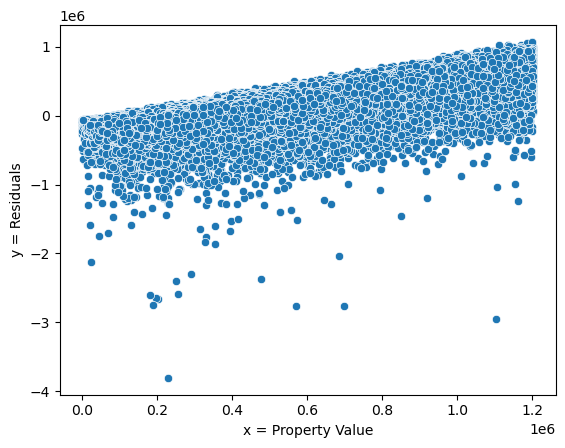

In [44]:
sns.scatterplot(data=train, x='property_value', y='residuals')
plt.xlabel('x = Property Value')
plt.ylabel('y = Residuals')
plt.show()

In [45]:
# # plot data with baseline
# plt.scatter(train.area, train.property_value)
# plt.axhline(baseline, ls=':')

# plt.xlabel('x = Area')
# plt.ylabel('y = Property Value')
# plt.show()

In [46]:
# #scatter is my actuals
# plt.scatter(train.area, train.property_value)

# #lineplot is my regression line
# plt.plot(train.area, train.yhat, color='orange')
# plt.axhline(baseline, ls=':', color='red')

# plt.xlabel('x = Area')
# plt.ylabel('y = Tax Value')
# plt.title('OLS linear model')
# plt.ylim(0, 1_250_000)
# plt.show()

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [9]:
#calculate mean
baseline = train.property_value.mean()
baseline

363532.06723244983

In [10]:
#add it to the df
train['baseline'] = baseline

In [11]:
# residual = actual - predicted
train['baseline_residual'] = train.property_value - train.baseline

# residual = actual - predicted
train['residuals'] = train.property_value - train.yhat

#baseline residual sum
train.baseline_residual.sum().round(2)

#osl residual sum
train.residuals.sum().round(2)

# the difference between yhat and taxvalue, just squared
train['baseline_residual_2'] = train.baseline_residual ** 2
train['residual_2'] = train.residuals **2

In [15]:
#add the residuals together to calculate the Sum of Squared Errors. 
SSE = train.residual_2.sum()

# The TSS is the same as SSE_baseline
TSS = train.baseline_residual_2.sum()

#calcaluate ESS
ESS = TSS-SSE

#calcaluate MSE
MSE = SSE/len(train)

#calculate RMSE
RMSE = MSE ** .5

In [16]:
print('SSE =', "{:.1f}".format(SSE))
print(f'\nESS = {ESS:.1f}')
print(f'\nTSS = {TSS:.1f}')
print(f'\nMSE = {MSE:.1f}')
print(f'\nRMSE = {RMSE:.1f}')

SSE = 52446247997834368.0

ESS = 19763181828771520.0

TSS = 72209429826605888.0

MSE = 42992181337.4

RMSE = 207345.6


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [17]:
#add the residuals together to calculate the Sum of Squared Errors. 
SSE_baseline = train.baseline_residual_2.sum()

#calcaluate MSE
MSE_baseline = SSE_baseline/len(train)

#calculate RMSE
RMSE_baseline = MSE_baseline ** .5

In [18]:
print("SSE_baseline =", "{:.1f}".format(SSE_baseline))

print("\nMSE_baseline =", "{:.1f}".format(MSE_baseline))

print("\nRMSE baseline = ", "{:.1f}".format(RMSE_baseline))

SSE_baseline = 72209429826605888.0

MSE_baseline = 59192812067.4

RMSE baseline =  243295.7


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [19]:
# Print the SSE for baseline and the model
print(f"SSE_baseline: {SSE_baseline:.2f}")
print(f"SSE: {SSE:.2f}")

SSE_baseline: 72209429826605888.00
SSE: 52446247997834368.00


In [20]:
# Check if the model has lower SSE than baseline
if SSE < SSE_baseline:
    print("The model performs better than the baseline model.")
else:
    print("The model does not perform better than the baseline model.")

The model performs better than the baseline model.


### 7. What is the amount of variance explained in your model?

In [21]:
# Calculate R_2
R_2 = ESS/TSS
R_2

0.27369253401153

### 8. Is your model better than the baseline model?

>- In the model perform better than baseline but however, in the overall the model is not a great model as R_2 is too far from 1.

### 9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [22]:
train.head()

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county,tax_rate,yhat,baseline,baseline_residual,residuals,baseline_residual_2,residual_2
1571798,4,2.5,2987,885000,2006,13617.38,Orange,0.02,580049.248064,363532.067232,521467.932768,304950.751936,2.719288e+11,9.299496e+10
1723553,3,2.0,3013,489511,1977,5768.57,LA,0.01,584607.353498,363532.067232,125978.932768,-95096.353498,1.587069e+10,9.043316e+09
718174,4,3.0,2572,390915,1986,4944.11,LA,0.01,507294.872860,363532.067232,27382.932768,-116379.872860,7.498250e+08,1.354427e+10
1663205,3,1.0,1589,321758,1959,4031.78,LA,0.01,334963.425088,363532.067232,-41774.067232,-13205.425088,1.745073e+09,1.743833e+08
1087891,3,2.0,1727,231737,1962,2708.80,Ventura,0.01,359156.446240,363532.067232,-131795.067232,-127419.446240,1.736994e+10,1.623572e+10


In [48]:
# create a linear regression object
lr = LinearRegression()

# fit the model to training data
lr.fit(train[['area']], train.property_value)

# make predictions
yhat = lr.predict(train[['area']])

In [51]:
train['baseline'] = train.property_value.mean()

In [47]:
def plot_residuals(y, yhat):
    # residual = actual - predicted
    residuals = y - yhat
    
    # plot a scatterplot graph
    sns.scatterplot(x=y, y=residuals)
    plt.xlabel('Property Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.axhline(y=0, color='r', linestyle='-')
    
    return plt.show()

In [32]:
def regression_errors(y, yhat):    
    ## Sum of Squared Errors
    SSE = MSE * len(train)

    # Total sum of squares
    # TSS = ESS + SSE
    TSS = ESS + SSE

    # Explained sum of squares
    # Sum the squares of the (prediction - mean of tax value)
    ESS = ((yhat - train.tax_value.mean())**2).sum()

    # Mean squared error
    MSE = mean_squared_error(train.tax_value, yhat)

    # Root mean squared error
    # Raising to the power of 1/2 (0.5) is the same as taking the square root
    RMSE = MSE ** .5
    
    return SSE, ESS, TSS, MSE, RMSE

In [27]:
def baseline_mean_errors(y):
    # Use the MSE to find the SSE
    SSE_baseline = MSE_baseline * len(train)

    # Compute the mean squared error for the baseline
    MSE_baseline = mean_squared_error(train.tax_value, train.baseline)

    #calculate RMSE
    RMSE_baseline = MSE_baseline ** .5
    
    return SSE_baseline, MSE_baseline, RMSE_baseline

In [61]:
def better_than_baseline(y, yhat):
    # Calculate baseline residuals and SSE
    baseline_residual = y - y.mean()
    SSE_baseline = (baseline_residual ** 2).sum()

    # Calculate SSE for the given model
    SSE = ((y - yhat) ** 2).sum()
    
    # Check if the model has lower SSE than baseline
    if SSE < SSE_baseline:
        print("The model performs better than the baseline model.")
    else:
        print("The model does not perform better than the baseline model.")


In [62]:
better_than_baseline(train.property_value, yhat)

7.220942982660589e+16
5.244624799783437e+16


True

In [33]:
regression_errors(train)

(5.244624799783437e+16,
 1.976318182877152e+16,
 7.220942982660589e+16,
 42992181337.3815,
 207345.56020658242)

In [34]:
baseline_mean_errors(train)

(7.220942982660589e+16, 59192812067.367615, 243295.7296529629)

In [35]:
better_than_baseline(SSE, SSE_baseline)

The model does not perform better than the baseline model.


In [ ]:
# Calculate the r2 using the r2_score
r2_score(train.property_value, yhat)
 and R_2 > .5

In [ ]:
# make it
lr = LinearRegression()
# fit it to training data
model = lr.fit(train[['area']], train.property_value)
# use it
# we will use lm.predict to make predictions 
predict = lr.predict(train[['area']])

yhat = predict